<a href="https://colab.research.google.com/github/brian-ho/intro-to-urban-data/blob/main/S13_Joins_and_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example demo for joining and aggregating data

When you join data together — either as a spatial join (sjoin) or normal join — you can end up with repeated columns. This is because multiple rows in can match to a single row.

In this example, we'll join parks and water fountains. Each park can have many water fountains!

If we want to count how many water fountains we need, we can group or aggregate them.

In [33]:
# Import module and packages
import geopandas as gpd
from pathlib import Path
from shapely import wkt

In [34]:
# You can use the 'Cornell Example Data' folder from the previous class
DATA_DIRECTORY = "/content/drive/MyDrive/Cornell AAP - MSAUD/ARCH 6131/Example Data/Cornell Example Data"

## Load the data

<Axes: >

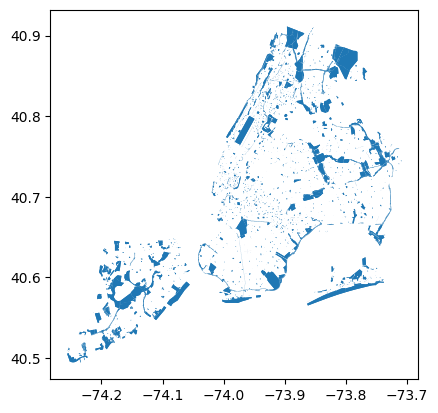

In [35]:
# Load parks
parks_gdf = gpd.read_file(Path(DATA_DIRECTORY) / "Parks Properties_20241028.geojson")
parks_gdf.plot()

In [71]:
parks_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   jurisdiction     4099 non-null   object        
 1   mapped           4092 non-null   object        
 2   zipcode          4098 non-null   object        
 3   acres            4101 non-null   object        
 4   location         4101 non-null   object        
 5   nys_assembly     4099 non-null   object        
 6   councildistrict  4099 non-null   object        
 7   url              3820 non-null   object        
 8   typecategory     4101 non-null   object        
 9   us_congress      4092 non-null   object        
 10  eapply           3899 non-null   object        
 11  parentid         4101 non-null   object        
 12  gispropnum       4101 non-null   object        
 13  retired          4101 non-null   object        
 14  communityboard   4100 non-null  

In [46]:
# Load water fountains — notice how this one does not have a 'geometry' column
# It will load as a DataFrame, with a 'Point' column
# We need to convert it to a proper GeoDataFrame
fountains_gdf = gpd.read_file(
    Path(DATA_DIRECTORY) / "NYC_Parks_Drinking_Fountains_20241028.csv"
)

print(f"fountains_gdf is a {type(fountains_gdf).__name__}!")
fountains_gdf.head()

fountains_gdf is a DataFrame!


,System,FountainType,Position,Painted,GISPropNum,PropName,OMPPropID,Borough,FountainCount,Department,District,FeatureStatus,Point
0,B296-DF0360,C,In Playground,NO,B296,Luna Playground,B296,B,1,B-13,C-Luna Playground,Active,POINT (-73.978922 40.57606)
1,B057-DF1014,E,,,B057,Marine Park,B057,B,1,B-18,E-Marine Park,Active,POINT (-73.921023 40.58947)
2,B066-DF0720,E,Out in Open,NO,B066,Owl's Head Park,B066,B,1,B-10,E-Owl's Head Park,Active,POINT (-74.034849 40.640323)
3,B286-DF0398,A,Just Outside Playground,YES,B286,Bartlett Playground,B286,B,1,B-01,A-Bartlett Playground,Active,POINT (-73.946395 40.700852)
4,B164-DF0627,A,Under Tree,YES,B164,Bath Beach Park,B164,B,1,B-11,A-Bath Beach Park,Active,POINT (-74.010973 40.602585)


<Axes: >

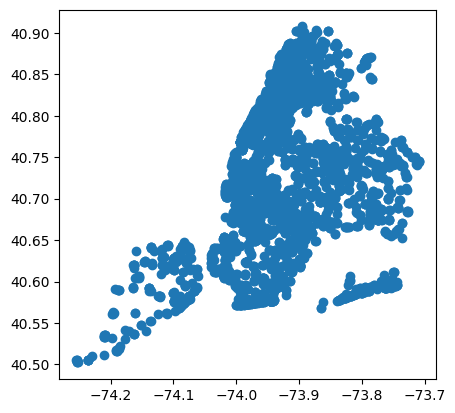

In [48]:
# We can convert the 'Point' column to geometry using wkt.loads()
fountains_gdf["geometry"] = fountains_gdf["Point"].apply(wkt.loads)

# Now we have geometry and can turn it into a GeoDataFrame
# Don't forget to set the appropriate CRS
fountains_gdf = gpd.GeoDataFrame(fountains_gdf, geometry="geometry", crs=4326)
fountains_gdf.plot()

In [73]:
fountains_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   System         3849 non-null   object  
 1   FountainType   3849 non-null   object  
 2   Position       3849 non-null   object  
 3   Painted        3849 non-null   object  
 4   GISPropNum     3849 non-null   object  
 5   PropName       3849 non-null   object  
 6   OMPPropID      3849 non-null   object  
 7   Borough        3849 non-null   object  
 8   FountainCount  3849 non-null   object  
 9   Department     3849 non-null   object  
 10  District       3849 non-null   object  
 11  FeatureStatus  3849 non-null   object  
 12  Point          3849 non-null   object  
 13  geometry       3849 non-null   geometry
dtypes: geometry(1), object(13)
memory usage: 421.1+ KB


## Join the data

In [53]:
# To illustrate the point, let's see how many parks there are
print(f"Parks data has {parks_gdf.shape[0]} rows and {parks_gdf.shape[1]} columns")

# ... and how many fountains
print(
    f"Fountains data has {fountains_gdf.shape[0]} rows and {fountains_gdf.shape[1]} columns"
)

Parks data has 4101 rows and 35 columns
Fountains data has 3849 rows and 14 columns


In [60]:
# Let's do a spatial join — how many results do we have now?
# We should have a lot more rows ... since there are many fountains per park
parks_and_fountains_gdf = parks_gdf.sjoin(fountains_gdf)
print(
    f"Joined data has {parks_and_fountains_gdf.shape[0]} rows and {parks_and_fountains_gdf.shape[1]} columns"
)

Joined data has 7474 rows and 49 columns


In [62]:
# Let's do a key-based join
# Based on the data dictionary, we know we can use 'gisobjid' and GISPropNum
parks_and_fountains_gdf = parks_gdf.set_index("gisobjid").sjoin(
    fountains_gdf.set_index("GISPropNum")
)
print(
    f"Joined data has {parks_and_fountains_gdf.shape[0]} rows and {parks_and_fountains_gdf.shape[1]} columns"
)

Joined data has 7474 rows and 47 columns


## Aggregate the data

In [76]:
# Let's say we want to sum up the 'FountainCount'
# First we need to convert it from a string to a number
parks_and_fountains_gdf["FountainCount"] = parks_and_fountains_gdf[
    "FountainCount"
].astype(int)

In [92]:
# Now we can group based on the 'gisobjid' and sum the 'FountainCount'
fountain_count_df = parks_and_fountains_gdf.groupby("gisobjid")[["FountainCount"]].sum()
fountain_count_df

,FountainCount
gisobjid,
100000000,38
100000001,28
100000002,4
100000003,28
100000004,4
...,...
100008344,18
100016513,6
100024490,2


<Axes: >

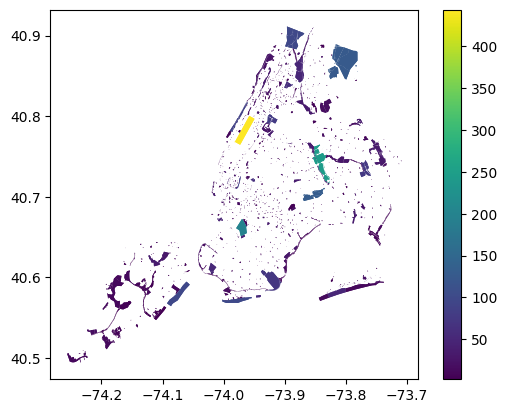

In [93]:
# ... and now we can join this back to the original parks data!
parks_with_fountain_count_gdf = parks_gdf.set_index("gisobjid").join(fountain_count_df)
parks_with_fountain_count_gdf.plot(column="FountainCount", legend=True)

In [101]:
# You can define quite a few different ways to aggregate
# In this case, this lets us compare the sum of the 'FountainCount' vs. just counting the geometries
fountain_aggregate_df = parks_and_fountains_gdf.groupby("gisobjid").agg(
    {"FountainCount": "sum", "geometry": "count"}
)
fountain_aggregate_df

,FountainCount,geometry
gisobjid,,
100000000,38,38
100000001,28,28
100000002,4,4
100000003,28,28
100000004,4,4
...,...,...
100008344,18,14
100016513,6,6
100024490,2,2
